In [134]:
import warnings
warnings.filterwarnings('ignore')

In [135]:
import pandas as pd
import sqlite3
from sqlite3 import Error
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter as counter
import numpy as np
from urllib.request import urlopen
import numpy as np 
from scipy import stats
%matplotlib inline

In [138]:
conn = sqlite3.connect('FifaApp/db/WorldCup.sqlite')
c = conn.cursor()

In [139]:
data = pd.read_csv("Resources/RawData/fifaData.csv")
data.head()

,Nationality,Latitude,Longitude
0,Argentina,-38.416097,-63.616672
1,Portugal,39.399872,-8.224454
2,Brazil,-14.235004,-51.925280
3,Spain,40.463667,-3.749220
4,Belgium,50.503887,4.469936


In [123]:
data.to_sql('fifa_data', conn, if_exists = "replace")

In [124]:
fifa_df = pd.read_sql('Select * from fifa_data', conn)
fifa_df.head()

,index,Nationality,Latitude,Longitude
0,0,Argentina,-38.416097,-63.616672
1,1,Portugal,39.399872,-8.224454
2,2,Brazil,-14.235004,-51.925280
3,3,Spain,40.463667,-3.749220
4,4,Belgium,50.503887,4.469936


In [125]:
base_url = "https://sofifa.com/players?offset="
columns = ['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special']
data = pd.DataFrame(columns = columns)

In [126]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 4 columns):
index          164 non-null int64
Nationality    164 non-null object
Latitude       164 non-null float64
Longitude      164 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.2+ KB


In [127]:
fifa_df.describe()

,index,Latitude,Longitude
count,164.00000,164.000000,164.000000
mean,81.50000,21.835623,7.363000
std,47.48684,24.530772,57.177983
min,0.00000,-40.900557,-106.346771
25%,40.75000,7.497422,-15.212844
50%,81.50000,20.800787,14.462744
75%,122.25000,42.030526,32.575171
max,163.00000,64.963051,178.065032


In [128]:
fifa_df.nunique()

index          164
Nationality    164
Latitude       163
Longitude      163
dtype: int64

In [74]:
youngest_players = fifa_df.sort_values('Age', ascending = True)[['Name', 'Nationality', 'Age']].head(10)
youngest_players.set_index('Name', inplace=True)
print(youngest_players)

                        Nationality  Age
Name                                    
G. Nugent                   England   16
J. Olstad                    Norway   16
H. Massengo                  France   16
J. Italiano               Australia   16
N. Ayéva                     Sweden   16
K. Broda                     Poland   16
L. D'Arrigo               Australia   16
Y. Verschaeren              Belgium   16
B. Nygren                    Sweden   16
B. O'Gorman     Republic of Ireland   16


In [75]:
oldest_players = fifa_df.sort_values('Age', ascending = False)[['Name', 'Nationality', 'Age']].head(10)
oldest_players.set_index('Name', inplace=True)
print(oldest_players)

                     Nationality  Age
Name                                 
O. Pérez                  Mexico   45
K. Pilkington            England   44
T. Warner      Trinidad & Tobago   44
S. Narazaki                Japan   42
C. Muñoz               Argentina   41
J. Villar               Paraguay   41
H. Sulaimani        Saudi Arabia   41
M. Tyler                 England   41
B. Nivet                  France   41
F. Kippe                  Norway   40


In [76]:
fifa_df['Nationality'].value_counts().head(10)


England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: Nationality, dtype: int64

In [77]:
fifa_df['Age'].value_counts()

21    1423
26    1387
24    1358
22    1340
23    1332
25    1319
20    1240
27    1162
28    1101
19    1024
29     959
30     917
18     732
31     707
32     574
33     408
34     404
17     289
35     196
36     127
37      82
16      42
38      37
39      25
40      13
41       5
44       2
42       1
45       1
Name: Age, dtype: int64

In [115]:
fifa_df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,18207.0,9.103000e+03,5.256053e+03,0.000000,4551.500000,9103.000000,1.365450e+04,1.820600e+04
Unnamed: 0,18207.0,9.103000e+03,5.256053e+03,0.000000,4551.500000,9103.000000,1.365450e+04,1.820600e+04
ID,18207.0,2.142983e+05,2.996524e+04,16.000000,200315.500000,221759.000000,2.365295e+05,2.466200e+05
Age,18207.0,2.512221e+01,4.669943e+00,16.000000,21.000000,25.000000,2.800000e+01,4.500000e+01
Latitude,18207.0,3.062417e+01,2.919340e+01,-40.900557,17.570692,41.666341,5.191944e+01,6.496305e+01
Longitude,18207.0,-3.634808e+00,5.137208e+01,-106.346771,-23.041800,0.824782,1.256738e+01,1.780650e+02
Overall,18207.0,6.623870e+01,6.908930e+00,46.000000,62.000000,66.000000,7.100000e+01,9.400000e+01
Potential,18207.0,7.130730e+01,6.136496e+00,48.000000,67.000000,71.000000,7.500000e+01,9.500000e+01
Value,18207.0,2.410696e+06,5.594933e+06,0.000000,300000.000000,675000.000000,2.000000e+06,1.185000e+08
Wage,18207.0,9.731312e+03,2.199929e+04,0.000000,1000.000000,3000.000000,9.000000e+03,5.650000e+05


In [79]:
prefered_leftFoot=fifa_df[fifa_df['Preferred Foot'] == 'Left'][['Name','Overall','Position', 'Nationality']].head(10)
prefered_leftFoot.set_index('Name',inplace=True)
prefered_leftFoot


,Overall,Position,Nationality
Name,,,
L. Messi,94,RF,Argentina
David Silva,90,LCM,Spain
P. Dybala,89,LF,Argentina
A. Griezmann,89,CAM,France
T. Courtois,89,GK,Belgium
G. Chiellini,89,LCB,Italy
M. Salah,88,RM,Egypt
J. Rodríguez,88,LAM,Colombia
Marcelo,88,LB,Brazil


In [80]:
prefered_rightFoot=fifa_df[fifa_df['Preferred Foot'] == 'Right'][['Name','Overall','Position','Nationality']].head(10)
prefered_rightFoot.set_index('Name',inplace=True)
prefered_rightFoot

,Overall,Position,Nationality
Name,,,
Cristiano Ronaldo,94,ST,Portugal
Neymar Jr,92,LW,Brazil
De Gea,91,GK,Spain
K. De Bruyne,91,RCM,Belgium
E. Hazard,91,LF,Belgium
L. Modrić,91,RCM,Croatia
L. Suárez,91,RS,Uruguay
Sergio Ramos,91,RCB,Spain
J. Oblak,90,GK,Slovenia


In [81]:
greatShot=fifa_df.sort_values(by = 'ShotPower' , ascending = False)[['Name' , 'Nationality' ,'ShotPower' ]].head(10)
greatShot.set_index('Name',inplace=True)
greatShot

,Nationality,ShotPower
Name,,
Cristiano Ronaldo,Portugal,95.0
Hulk,Brazil,94.0
F. Guarín,Colombia,93.0
L. Podolski,Germany,92.0
G. Bale,Wales,92.0
Naldo,Brazil,92.0
K. De Bruyne,Belgium,91.0
A. Kolarov,Serbia,91.0
P. Pogba,France,90.0


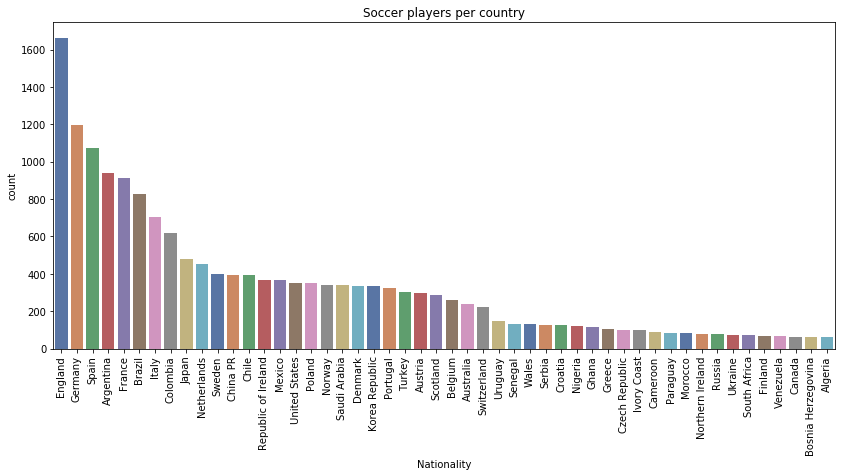

In [82]:
plt.figure(1 , figsize = (14 , 6))
countries = []
c = counter(fifa_df['Nationality']).most_common()[:50]
for n in range(50):
    countries.append(c[n][0])

# value_counts to get unique values

sns.countplot(x  = 'Nationality' ,
              data = fifa_df[fifa_df['Nationality'].isin(countries)] ,
              order  = fifa_df[fifa_df['Nationality'].isin(countries)]['Nationality'].value_counts().index , 
             palette = 'deep') 
plt.xticks(rotation = 90)
plt.title('Soccer players per country' )
plt.show()

In [83]:
print('Number of players from England:',fifa_df['Nationality'].value_counts()['England'])

Number of players from England: 1662


Text(0, 0.5, 'Shot Stopping Score')

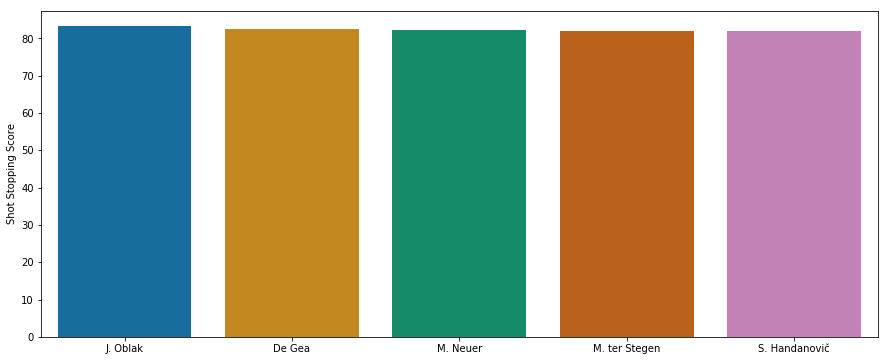

In [85]:
plt.figure(figsize=(15,6))
 
# Generate sequential data and plot
sd = fifa_df.sort_values('gk_Shot_Stopper', ascending=False)[:5]
x1 = np.array(list(sd['Name']))
y1 = np.array(list(sd['gk_Shot_Stopper']))
sns.barplot(x1, y1, palette= "colorblind")
plt.ylabel("Shot Stopping Score")

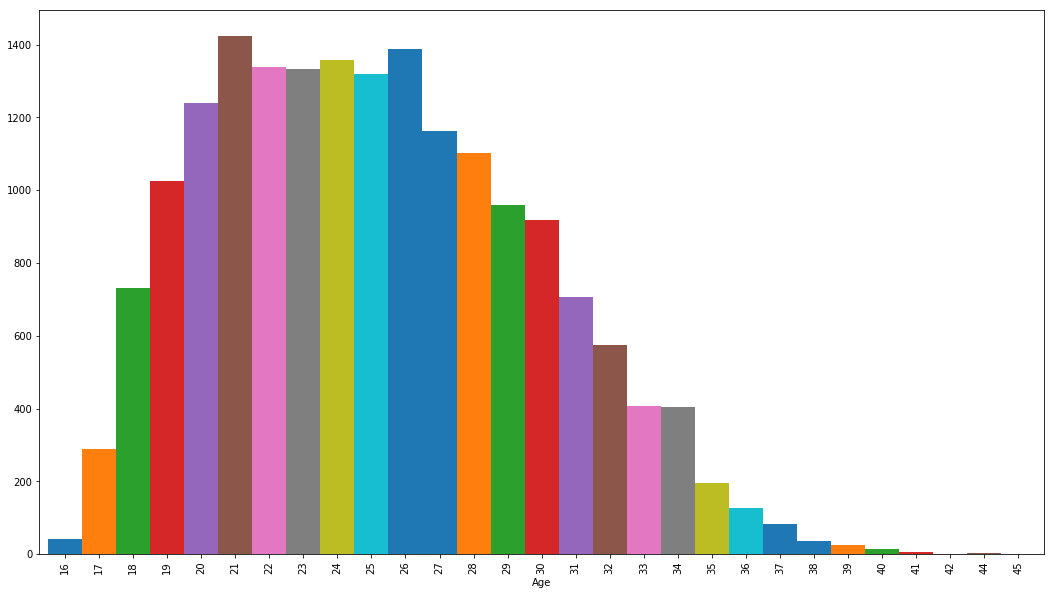

In [103]:
plt.figure(figsize=(18, 10))
fifa_df.groupby('Age')['Age'].count().plot(kind='bar', width=1)

In [111]:
fifa_df[['Name', 'Value', 'Wage', 'Release Clause']].head()


,Name,Value,Wage,Release Clause
0,L. Messi,110500000.0,565000.0,226500000.0
1,Cristiano Ronaldo,77000000.0,405000.0,127100000.0
2,Neymar Jr,118500000.0,290000.0,228100000.0
3,De Gea,72000000.0,260000.0,138600000.0
4,K. De Bruyne,102000000.0,355000.0,196400000.0
